In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/corona-virus-report/day_wise.csv')

In [4]:
print(df.columns)

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')


In [5]:
df.shape

(188, 12)

In [6]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [7]:
df.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [8]:
df.isnull().mean()

Date                      0.0
Confirmed                 0.0
Deaths                    0.0
Recovered                 0.0
Active                    0.0
New cases                 0.0
New deaths                0.0
New recovered             0.0
Deaths / 100 Cases        0.0
Recovered / 100 Cases     0.0
Deaths / 100 Recovered    0.0
No. of countries          0.0
dtype: float64

In [9]:
df.drop(["Date"],axis = 1,inplace = True)

In [10]:
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


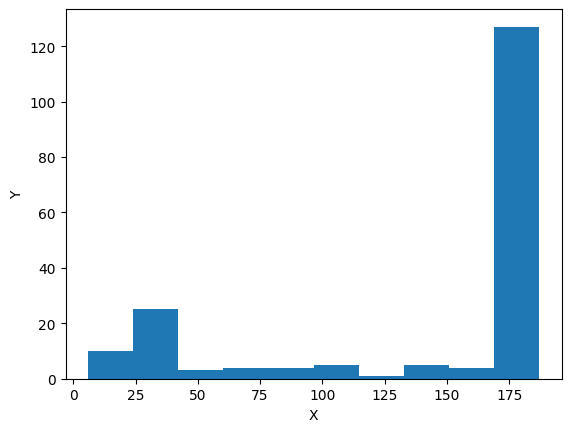

In [11]:
plt.hist(df["No. of countries"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)

In [14]:
x_train.shape
y_train.shape

(141,)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [17]:

y_pred = rf.predict(x_test)
y_pred

array([187. , 187. , 187. , 187. ,  95. , 187. ,  23.9,  26. , 185.2,
       187. , 182. , 187. , 187. , 187. , 181.8, 187. , 187. , 184. ,
       187. , 184. , 178.4,  83.4,  14.1, 184. , 187. , 187. , 186. ,
        31.7, 187. , 187. , 182.4,  11.3, 187. , 187. , 187. , 180.6,
       165.9, 187. ,  26.9, 187. , 175.6, 187. , 187. ,  67.7, 182. ,
       187. , 187. ])

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

3.148723404255321

In [19]:
np.sqrt(mse)

1.7744642583764039